jumlah pembeli harian (daily number of customers) selama bulan Desember.

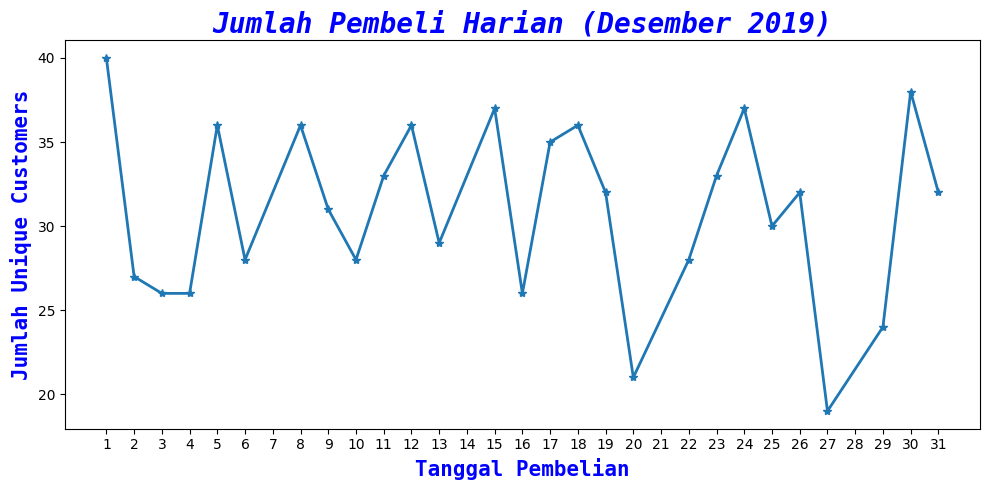

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file CSV
url = 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv'
df = pd.read_csv(url)

# Mengubah kolom order_date menjadi tipe data datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Filter data untuk bulan Desember 2019
december_data = df[(df['order_date'].dt.month == 12) & (df['order_date'].dt.year == 2019)]

# Menghitung jumlah unique customers di tiap tanggal
daily_customers = december_data.groupby(december_data['order_date'].dt.day)['customer_id'].nunique()

# Membuat line chart
plt.figure(figsize=(10, 5))
plt.plot(daily_customers.index, daily_customers.values, marker='*', linestyle='-', linewidth=2)
plt.xlabel('Tanggal Pembelian', fontsize=15, color='b', weight='semibold', family='monospace')
plt.ylabel('Jumlah Unique Customers', fontsize=15, color='b', weight='semibold', family='monospace')
plt.title('Jumlah Pembeli Harian (Desember 2019)', fontstyle='oblique', fontsize=20, color='b', weight='semibold', family='monospace')
plt.xticks(range(1, 32))
plt.tight_layout()

# Menampilkan plot
plt.show()


Case 1: Menentukan brand top 5

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file CSV
url = 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv'
df = pd.read_csv(url)

# Menghitung jumlah produk terjual per brand
brand_product_count = december_data.groupby('brand')['quantity'].sum().reset_index()

# Mengurutkan berdasarkan jumlah produk terjual secara menurun
brand_product_count_sorted = brand_product_count.sort_values('quantity', ascending=False)

# Menampilkan brand top 5
top_5_brands = brand_product_count_sorted.head(5)

# Menampilkan brand top 5
print("Penjualan Top 5 Brand:")
for index, row in top_5_brands.iterrows():
    print(f"{row['brand']}: {row['quantity']} produk terjual.")

Penjualan Top 5 Brand:
BRAND_S: 2197 produk terjual.
BRAND_P: 2194 produk terjual.
BRAND_R: 1508 produk terjual.
BRAND_C: 1365 produk terjual.
BRAND_A: 1315 produk terjual.


Case 2: Multi-line chart daily quantity untuk brand top 5

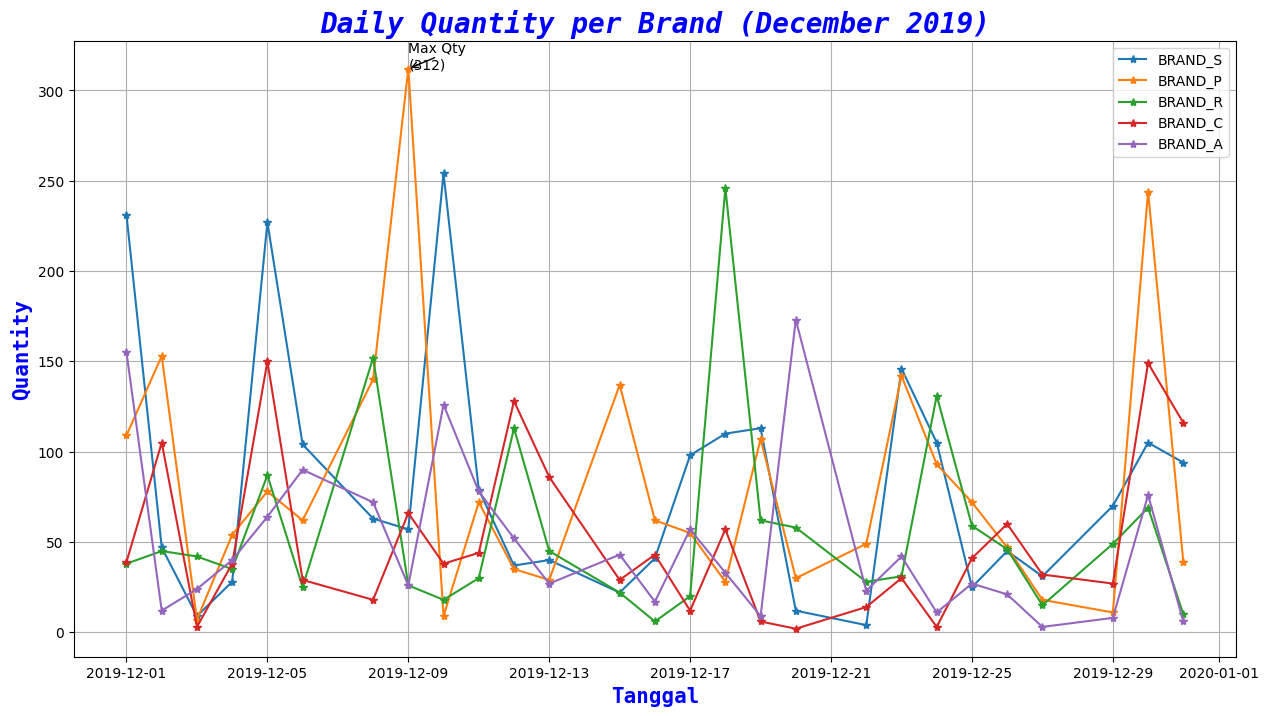

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file CSV
url = 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv'
df = pd.read_csv(url)

# Mengubah format tanggal menjadi tipe data datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Mengambil data penjualan bulan Desember 2019
df_december = df[(df['order_date'].dt.year == 2019) & (df['order_date'].dt.month == 12)]

# Menghitung jumlah quantity per brand per tanggal
daily_quantity = df_december.groupby(['order_date', 'brand'])['quantity'].sum().reset_index()

# Mendapatkan top 5 brand berdasarkan jumlah quantity tertinggi
top5_brands = daily_quantity.groupby('brand')['quantity'].sum().nlargest(5).index.tolist()

# Filter data hanya untuk top 5 brand
df_top5 = daily_quantity[daily_quantity['brand'].isin(top5_brands)]

# Membuat multi-line chart
plt.figure(figsize=(15, 8))
for brand in top5_brands:
    data_brand = df_top5[df_top5['brand'] == brand]
    plt.plot(data_brand['order_date'], data_brand['quantity'], marker='*', label=brand)

# Menambahkan anotasi untuk titik lonjakan
max_quantity = df_top5['quantity'].max()
max_quantity_date = df_top5[df_top5['quantity'] == max_quantity]['order_date'].values[0]
plt.annotate(f'Max Qty\n({max_quantity})', xy=(max_quantity_date, max_quantity), arrowprops=dict(arrowstyle='->'))

# Mengatur label sumbu x dan y, serta judul
plt.xlabel('Tanggal', fontsize=15, color='b', weight='semibold', family='monospace')
plt.ylabel('Quantity', fontsize=15, color='b', weight='semibold', family='monospace')
plt.title('Daily Quantity per Brand (December 2019)', fontstyle='oblique', fontsize=20, color='b', weight='semibold', family='monospace')

# Menampilkan legenda
plt.legend()

# Menampilkan chart
plt.grid(True)
plt.show()

Case 3: Cari tahu jumlah product untuk masing-masing brand yang laku selama bulan Desember 2019. Gunakan barchart untuk visualisasinya, urutkan dengan yang kiri adalah brand dengan product lebih banyak.

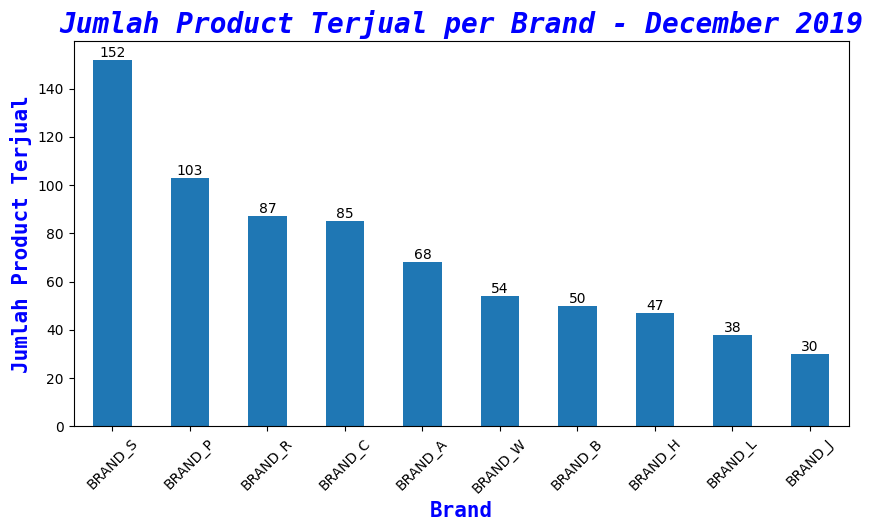

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file CSV
url = 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv'
df = pd.read_csv(url)

# Mengubah kolom order_date menjadi tipe data datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Mengambil data penjualan bulan Desember 2019
df_december = df[(df['order_date'].dt.year == 2019) & (df['order_date'].dt.month == 12)]

# Menghitung jumlah product terjual per brand
brand_product_count = df_december.groupby('brand')['product_id'].nunique().sort_values(ascending=False)

# Membuat barchart
plt.figure(figsize=(10, 5))
brand_product_count.plot(kind='bar')

# Mengatur label sumbu x dan y, dan judul
plt.xlabel('Brand', fontsize=15, color='b', weight='semibold', family='monospace')
plt.ylabel('Jumlah Product Terjual', fontsize=15, color='b', weight='semibold', family='monospace')
plt.title('Jumlah Product Terjual per Brand - December 2019', fontstyle='oblique', fontsize=20, color='b', weight='semibold', family='monospace')
plt.xticks(rotation=45)

# Menampilkan nilai di atas bar
for i, v in enumerate(brand_product_count):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Menampilkan chart
plt.show()

Case 4: Penjualan produk diatas 100 dan dibawah 100 selama Desember 2019 Gunakan stacked chart, untuk breakdown barchart yang di Case 3, antara product yang terjual >= 100 dan < 100 di bulan Desember 2019. Apakah ada pola yang menarik?

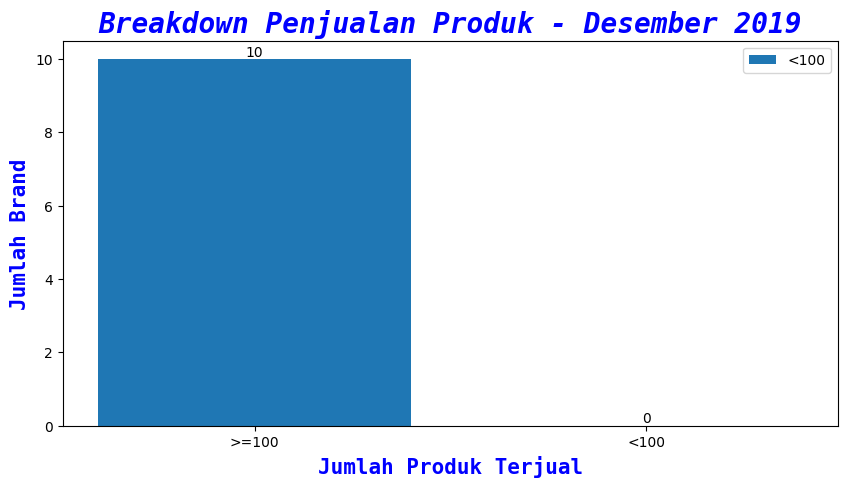

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file CSV
url = 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv'
df = pd.read_csv(url)

# Membuat kategori '>=100' dan '<100' berdasarkan jumlah produk terjual
brand_product_count_sorted['category'] = pd.cut(brand_product_count_sorted['quantity'], bins=[0, 100, float('inf')], labels=['<100', '>=100'])

# Menghitung jumlah brand pada setiap kategori
category_counts = brand_product_count_sorted['category'].value_counts()

# Membuat stacked chart
plt.figure(figsize=(10, 5))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Jumlah Produk Terjual', fontsize=15, color='b', weight='semibold', family='monospace')
plt.ylabel('Jumlah Brand', fontsize=15, color='b', weight='semibold', family='monospace')
plt.title('Breakdown Penjualan Produk - Desember 2019', fontstyle='oblique', fontsize=20, color='b', weight='semibold', family='monospace')
plt.legend(['<100', '>=100'])

# Menambahkan label pada setiap bar
for i, v in enumerate(category_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Menampilkan chart
plt.show()

Case 5: Murah atau mahalkah harga produk brand top 5 Gunakan histogram untuk melihat distribusi harga product-product yang ada di top 5 brand tersebut (untuk tiap product_id, ambil median harganya). Bagaimana persebaran harga product nya? Cenderung banyak yang murah atau yang mahal?

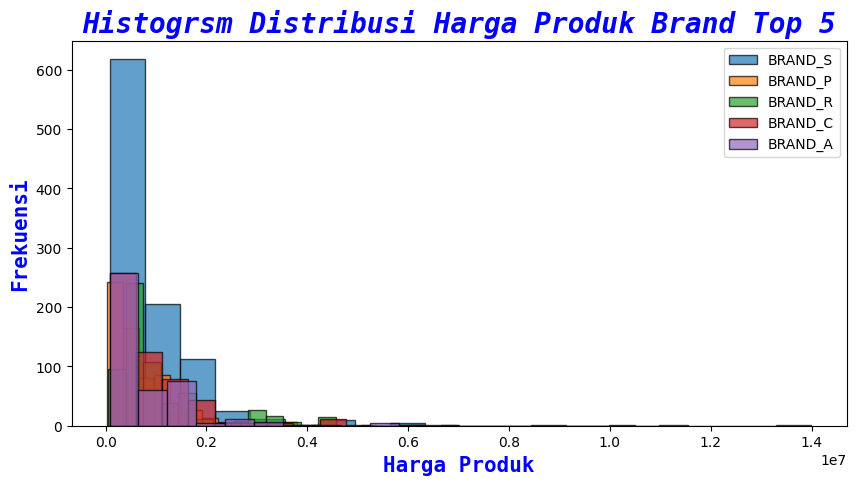

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file CSV
url = 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv'
df = pd.read_csv(url)

# Filter data untuk brand top 5
top_5_brands = brand_product_count_sorted.head(5)

# Filter data berdasarkan brand top 5
top_5_data = df[df['brand'].isin(top_5_brands['brand'])]

# Mengambil median harga per brand
brand_median_prices = top_5_data.groupby('brand')['item_price'].median()

# Membuat histogram
plt.figure(figsize=(10, 5))
for brand in top_5_brands['brand']:
    brand_data = top_5_data[top_5_data['brand'] == brand]
    plt.hist(brand_data['item_price'], bins=20, edgecolor='black', alpha=0.7, label=brand)
plt.xlabel('Harga Produk', fontsize=15, color='b', weight='semibold', family='monospace')
plt.ylabel('Frekuensi', fontsize=15, color='b', weight='semibold', family='monospace')
plt.title('Histogrsm Distribusi Harga Produk Brand Top 5', fontstyle='oblique', fontsize=20, color='b', weight='semibold', family='monospace')
plt.legend()

# Menampilkan histogram
plt.show()

Case 6a: Korelasi quantity vs GMV Untuk setiap product_id, cek scatterplot antara quantity dan GMV, apakah ada korelasi? Bagaimana dengan median harga vs quantity? Apakah product yang murah cenderung dibeli lebih banyak?

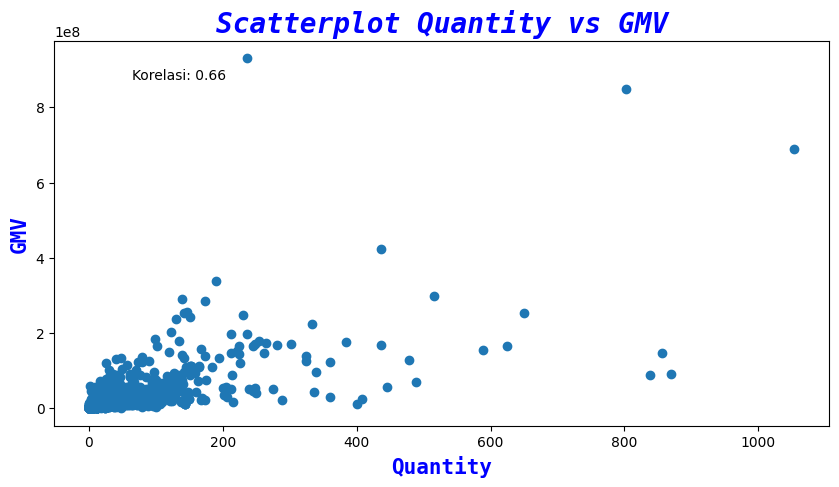

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file CSV
url = 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv'
df = pd.read_csv(url)

# Menghitung GMV (quantity * item_price)
df['GMV'] = df['quantity'] * df['item_price']
# Mengambil dataset product_id, quantity, GMV, dan item_price
data_product = df.groupby('product_id').agg({
    'quantity': 'sum',
    'GMV': 'sum',
    'item_price': 'median'
}).reset_index()

# Scatterplot quantity vs GMV
plt.figure(figsize=(10, 5))
plt.scatter(data_product['quantity'], data_product['GMV'])
plt.xlabel('Quantity', fontsize=15, color='b', weight='semibold', family='monospace')
plt.ylabel('GMV', fontsize=15, color='b', weight='semibold', family='monospace')
plt.title('Scatterplot Quantity vs GMV', fontstyle='oblique', fontsize=20, color='b', weight='semibold', family='monospace')

# Menghitung korelasi antara quantity dan GMV
correlation_gmv = data_product['quantity'].corr(data_product['GMV'])
plt.text(0.1, 0.9, f'Korelasi: {correlation_gmv:.2f}', transform=plt.gca().transAxes)

# Menampilkan scatterplot
plt.show()

Case 6b: Korelasi median harga vs quantity Untuk setiap product_id, cek scatterplot antara quantity dan GMV sudah kamu lakukan pada Case 6a? Untuk Case 6b ini bagaimanakah dengan median harga vs quantity? Apakah product yang murah cenderung dibeli lebih banyak?

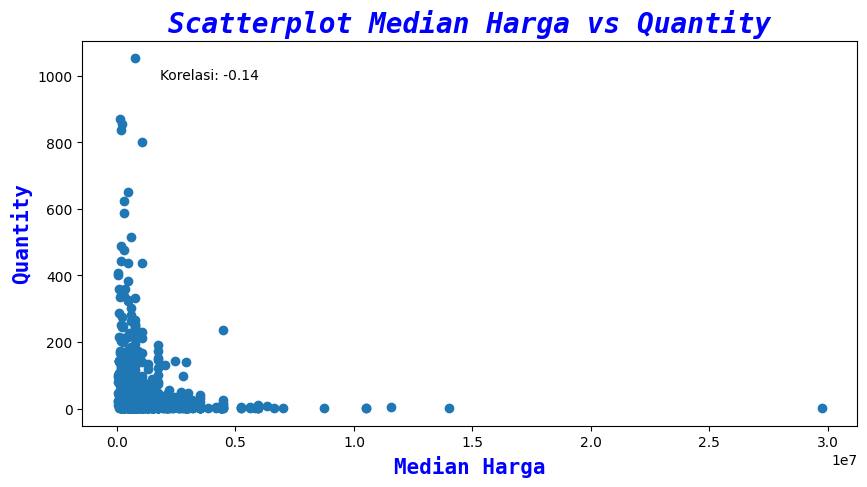

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file CSV
url = 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv'
df = pd.read_csv(url)

# Menghitung GMV (quantity * item_price)
df['GMV'] = df['quantity'] * df['item_price']

# Mengambil dataset product_id, quantity, GMV, dan item_price
data_product = df.groupby('product_id').agg({
    'quantity': 'sum',
    'GMV': 'sum',
    'item_price': 'median'
}).reset_index()

# Scatterplot median harga vs quantity
plt.figure(figsize=(10, 5))
plt.scatter(data_product['item_price'], data_product['quantity'])
plt.xlabel('Median Harga', fontsize=15, color='b', weight='semibold', family='monospace')
plt.ylabel('Quantity', fontsize=15, color='b', weight='semibold', family='monospace')
plt.title('Scatterplot Median Harga vs Quantity', fontstyle='oblique', fontsize=20, color='b', weight='semibold', family='monospace')

# Menghitung korelasi antara median harga dan quantity
correlation_price = data_product['item_price'].corr(data_product['quantity'])
plt.text(0.1, 0.9, f'Korelasi: {correlation_price:.2f}', transform=plt.gca().transAxes)

# Menampilkan scatterplot
plt.show()